In [4]:
#importing Important Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
#setting the parameters for the plot
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (5,3)

In [6]:
#Loading the datasetd
matches_df=pd.read_csv('IPL Matches 2008-2020.csv')
balls_df=pd.read_csv('IPL Ball-by-Ball 2008-2020.csv')

In [7]:
#optional processing
matches_df['date']=pd.to_datetime(matches_df['date'])
matches_df['season']=matches_df['date'].dt.year

In [ ]:
#Question 1 -> What was the count of matches played in each season?

matches_per_season=matches_df['season'].value_counts().sort_index()
matches_per_season.head(15)


,count
season,
2008,58
2009,57
2010,60
2011,73
2012,74
2013,76
2014,60
2015,59
2016,60


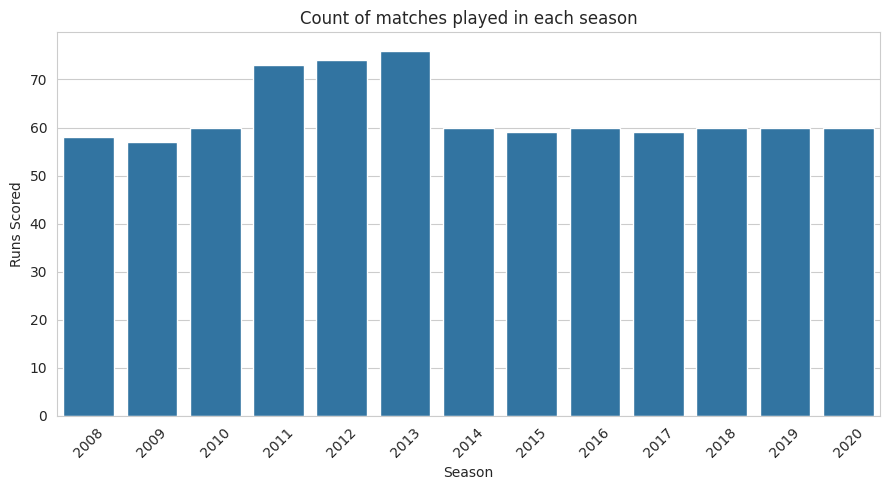

In [ ]:
#Visualization 1:

plt.figure(figsize=(9,5))
sns.barplot(x=matches_per_season.index, y=matches_per_season.values)
plt.title('Count of matches played in each season')
plt.xlabel('Season')
plt.ylabel('maches')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
#Question 2 -> How many runs were scored in each season?
merged_df=balls_df.merge(matches_df[['id','season']],on='id')
runs_per_season=merged_df.groupby('season')['total_runs'].sum().sort_index()
runs_per_season.head(15)

,total_runs
season,
2008,17937
2009,16320
2010,18864
2011,21154
2012,22453
2013,22541
2014,18909
2015,18332
2016,18862


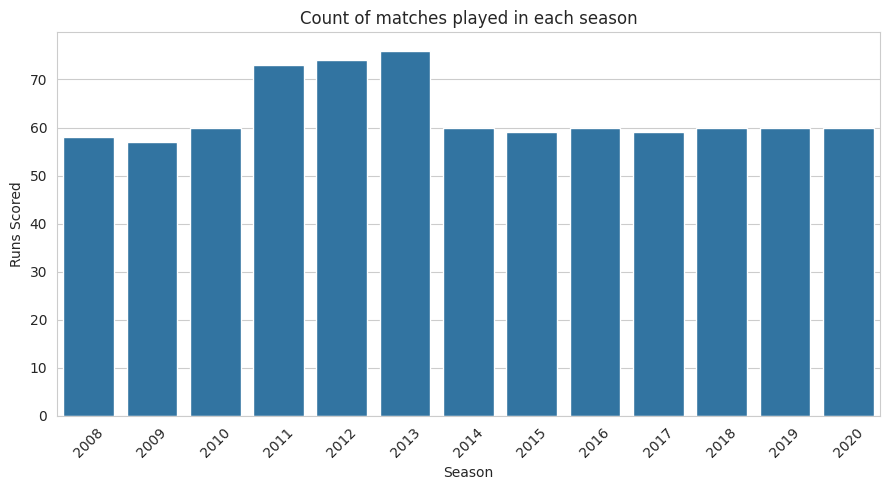

In [ ]:
#Visualization 2:

plt.figure(figsize=(9,5))
sns.barplot(x=matches_per_season.index, y=matches_per_season.values)
plt.title('Total Runs Scored')
plt.xlabel('Season')
plt.ylabel('Runs Scored')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
#Question 3 -> What were the runs scored per match in different seasons?
runs_per_match_season=runs_per_season/matches_per_season
runs_per_match_season.head(15)

,0
season,
2008,309.258621
2009,286.315789
2010,314.400000
2011,289.780822
2012,303.418919
2013,296.592105
2014,315.150000
2015,310.711864
2016,314.366667


In [ ]:
#Question 4 -> Who has umpired the most?

umpires=pd.concat([matches_df['umpire1'],matches_df['umpire2']]).value_counts()
umpires.head(1)

,count
S Ravi,121


In [ ]:
#other option
umpires.idxmax()

'S Ravi'

In [ ]:
#Question 5 -> Which team has won the most tosses?

toss_winners=matches_df['toss_winner'].value_counts()
toss_winners.head(1)

,count
toss_winner,
Mumbai Indians,106


In [ ]:
#other option
toss_winners.idxmax()

'Mumbai Indians'

In [ ]:
#Question 6 -> What does the team decide after winning the toss?

toss_decision=matches_df['toss_decision'].value_counts()
toss_decision.head()

,count
toss_decision,
field,496
bat,320


In [ ]:
#Question 7 -> How does the toss decision vary across seasons?

toss_decision_season=matches_df.groupby(['season','toss_decision']).count().unstack().fillna(0)
toss_decision_season.head(20)

id       city       date       player_of_match       venue  \
toss_decision bat field  bat field  bat field             bat field   bat   
season                                                                      
2008           26    32   26    32   26    32              26    32    26   
2009           35    22   35    22   35    22              35    22    35   
2010           39    21   39    21   39    21              39    21    39   
2011           25    48   25    48   25    48              24    48    25   
2012           37    37   37    37   37    37              37    37    37   
2013           45    31   45    31   45    31              45    31    45   
2014           19    41   14    33   19    41              19    41    19   
2015           25    34   25    34   25    34              25    32    25   
2016           11    49   11    49   11    49              11    49    11   
2017           11    48   11    48   11    48              11    48    11   
2018           10    50   10    50   10    50              10    50    10   
2019           10    50   10    50   10    50              10    49    10   
2020           27    33   27    33   27    33              27    33    27   

                     ... result_margin       eliminator       method        \
toss_decision field  ...           bat field        bat field    bat field   
season               ...                                                     
2008             32  ...            26    32         26    32      2     0   
2009             22  ...            35    21         35    22      1     2   
2010             21  ...            39    20         39    21      0     0   
2011             48  ...            24    48         24    48      1     2   
2012             37  ...            37    37         37    37      0     0   
2013             31  ...            44    30         45    31      0     0   
2014             41  ...            18    41         19    41      0     1   
2015             34  ...            25    31         25    32      1     1   
2016             49  ...            11    49         11    49      1     3   
2017             48  ...            10    48         11    48      0     1   
2018             50  ...            10    50         10    50      0     3   
2019             50  ...             9    48         10    49      0     0   
2020             33  ...            26    30         27    33      0     0   

              umpire1       umpire2        
toss_decision     bat field     bat field  
season                                     
2008               26    32      26    32  
2009               35    22      35    22  
2010               39    21      39    21  
2011               25    48      25    48  
2012               37    37      37    37  
2013               45    31      45    31  
2014               19    41      19    41  
2015               25    34      25    34  
2016               11    49      11    49  
2017               11    48      11    48  
2018               10    50      10    50  
2019               10    50      10    50  
2020               27    33      27    33  

[13 rows x 32 columns]

In [ ]:
'''
'''

<Figure size 900x500 with 0 Axes>

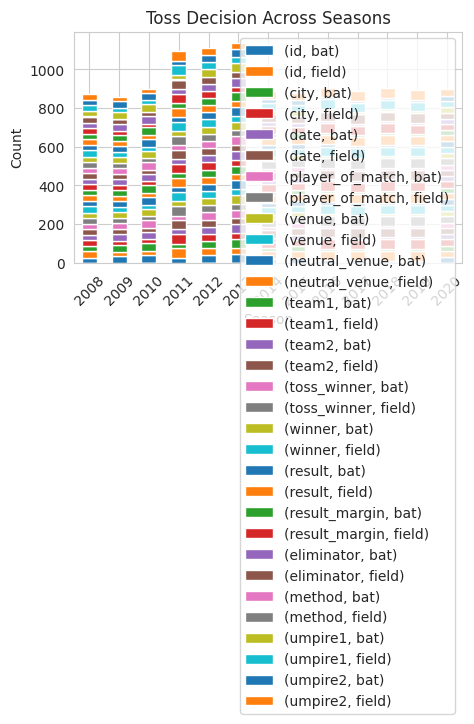

In [ ]:
#plot ->
plt.figure(figsize=(9,5))
toss_decision_season.plot(kind='bar',stacked=True)
plt.title('Toss Decision Across Seasons')
plt.xlabel('Season')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(loc ='upper right')
plt.show()

In [ ]:
#homework-> make sure that legend is not overlapping the plot

In [ ]:
#Question 8 -> Does winning the toss imply winning the game?

matches_df['toss_winner_won']=(matches_df['toss_winner']==matches_df['winner'])
toss_win_game_win=matches_df['toss_winner_won'].mean()
print(toss_win_game_win)


0.5122549019607843


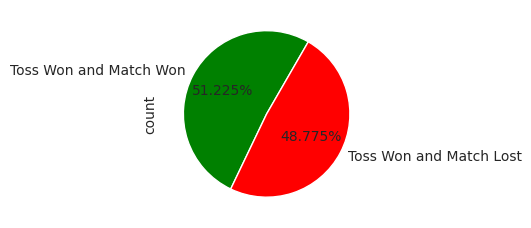

In [ ]:
#plot
plt.figure(figsize=(5,5))
toss_outcome_counts=matches_df['toss_winner_won'].value_counts()
toss_outcome_counts.index=['Toss Won and Match Won','Toss Won and Match Lost']
toss_outcome_counts.plot(kind='pie',autopct='%.3f%%',startangle=60, colors=['g','r'])
plt.tight_layout()
plt.show()

In [ ]:
#Question 9 -> How many times has the chasing team won the match?
matches_df_clean=matches_df.dropna(subset=['winner','toss_winner','toss_decision'])

chasing_win_condiotion=(
    ((matches_df_clean['toss_decision']=='field')&(matches_df_clean['toss_winner'] == matches_df_clean['winner']))|
    ((matches_df_clean['toss_decision']=='bat')&(matches_df_clean['toss_winner'] != matches_df_clean['winner']))
)
print(chasing_win_condiotion.sum())


447


In [ ]:
#Question 10 -> Which all teams had won this tournament?
# So basically we have to get the final winner from each season

final_matches=matches_df.sort_values('date').drop_duplicates('season',keep='last')
tournament_winner=final_matches['winner'].value_counts()
tournament_winner.index

Index(['Mumbai Indians', 'Chennai Super Kings', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Deccan Chargers', 'Sunrisers Hyderabad'],
      dtype='object', name='winner')

In [ ]:
#Question 11 -> Which team has played the most number of matches?

matches_played=pd.concat([matches_df['team1'],matches_df['team2']]).value_counts()
matches_played.head(1).index

Index(['Mumbai Indians'], dtype='object')

In [ ]:
#Question 12 -> Which team has won the most number of times?

most_wins=matches_df['winner'].value_counts()
most_wins.head(1).index

Index(['Mumbai Indians'], dtype='object', name='winner')

In [ ]:
#Question 13 -> Which team has the highest winning percentage?

total_matches_team=matches_df['team1'].value_counts().sort_index()
wins_team=matches_df['winner'].value_counts().sort_index()
wins_percentage=(wins_team/total_matches_team)*100
wins_percentage.idxmax()


'Rising Pune Supergiant'

In [ ]:
#home work -> change 'rising pune supergiant' to 'rising pune supergiants'

In [ ]:
#Question 14 -> Is there any lucky venue for a particular team?
lucky_venue=matches_df.groupby(['winner','venue']).size().reset_index(name='win_count')
lucky_venue=lucky_venue.sort_values('win_count',ascending=False)
lucky_venue_per_team=lucky_venue.groupby('winner').first().sort_values('win_count',ascending=False).reset_index()
lucky_venue_per_team

,winner,venue,win_count
0,Kolkata Knight Riders,Eden Gardens,45
1,Mumbai Indians,Wankhede Stadium,42
2,Chennai Super Kings,"MA Chidambaram Stadium, Chepauk",40
3,Rajasthan Royals,Sawai Mansingh Stadium,32
4,Sunrisers Hyderabad,"Rajiv Gandhi International Stadium, Uppal",30
5,Royal Challengers Bangalore,M Chinnaswamy Stadium,29
6,Delhi Daredevils,Feroz Shah Kotla,27
7,Kings XI Punjab,"Punjab Cricket Association Stadium, Mohali",18
8,Rising Pune Supergiant,Maharashtra Cricket Association Stadium,5
9,Pune Warriors,Subrata Roy Sahara Stadium,4


In [ ]:
#Question 15 -> Innings wise comparison between team

innings_comparison=balls_df.groupby(['batting_team','inning'])['total_runs'].sum().unstack().fillna(0)
innings_comparison

inning,1,2
batting_team,,
Chennai Super Kings,15344,13019
Deccan Chargers,6765,4698
Delhi Capitals,2860,2436
Delhi Daredevils,11247,13038
Gujarat Lions,2267,2589
Kings XI Punjab,15710,14307
Kochi Tuskers Kerala,1009,892
Kolkata Knight Riders,14842,14541
Mumbai Indians,18338,13948


In [ ]:
#Question 16 -> Which team has scored the most number of 200+ scores?
team_total_wins=balls_df.groupby(['id','batting_team'])['total_runs'].sum().reset_index()
team_total_wins=team_total_wins[team_total_wins['total_runs']>=200]
team_total_wins['batting_team'].value_counts().idxmax()


'Royal Challengers Bangalore'

In [ ]:
#Question 17 -> Which team has conceded 200+ scores the most?
team_200plus_against=balls_df.groupby(['id','bowling_team'])['total_runs'].sum().reset_index()
team_200plus_against=team_200plus_against[team_200plus_against['total_runs']>=200]
team_200plus_against['bowling_team'].value_counts().idxmax()

'Kings XI Punjab'

In [ ]:
#Question 18 -> What was the highest run scored by a team in a single match?
highest_team_score = team_total_wins.sort_values('total_runs',ascending=False)['batting_team'].head(1)
highest_team_score.values[0]

'Royal Challengers Bangalore'

In [ ]:
#Question 19 -> Which is the biggest win in terms of run margin?

biggest_run_margin_win=matches_df[matches_df['result']=='runs'].sort_values(by ='result_margin',ascending=False).head(1)
biggest_run_margin_win['winner'].values[0]

'Mumbai Indians'

In [ ]:
#Question 20 -> Which batsmen have played the most number of balls?
balls_played=balls_df.groupby('batsman')['ball'].count()
balls_played.idxmax()

'V Kohli'

In [ ]:
#Question 21 -> Who are the leading run-scorers of all time?

top_run_scorers=balls_df.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False).head(10)
top_run_scorers

,batsman_runs
batsman,
V Kohli,5878
SK Raina,5368
DA Warner,5254
RG Sharma,5230
S Dhawan,5197
AB de Villiers,4849
CH Gayle,4772
MS Dhoni,4632
RV Uthappa,4607


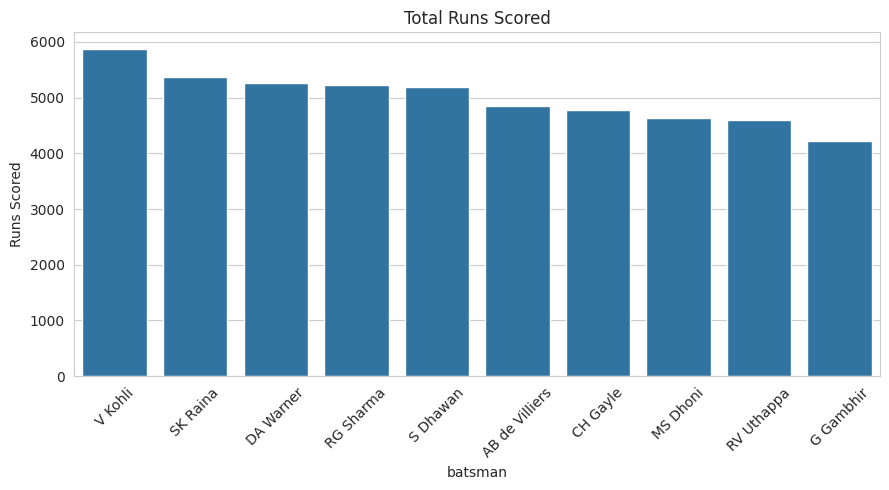

In [ ]:
#Visualization 2:

plt.figure(figsize=(9,5))
sns.barplot(x=top_run_scorers.index, y=top_run_scorers.values)
plt.title('Total Runs Scored')
plt.xlabel('batsman')
plt.ylabel('Runs Scored')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
#Question 22 -> Who has hit the most number of 4's?

#most_4s=balls_df[balls_df['batsman_runs']==4].groupby('batsman')['batsman_runs'].count().sort_values(ascending=False).head(1)
#most_4s

fours_per_batsman=balls_df[(balls_df['batsman_runs']==4) & balls_df['non_boundary']==0]['batsman'].value_counts()
fours_per_batsman.idxmax()

'V Kohli'

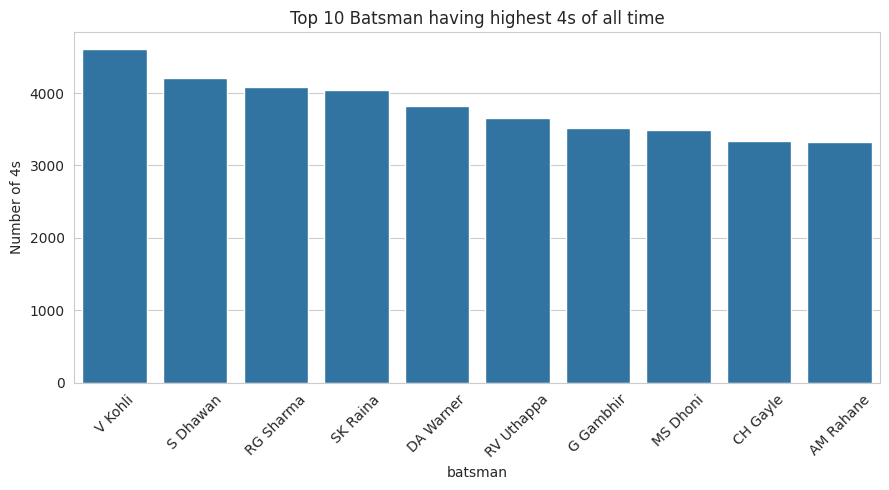

In [ ]:

plt.figure(figsize=(9,5))
sns.barplot(x=fours_per_batsman.index[:10], y=fours_per_batsman.values[:10])
plt.title('Top 10 Batsman having highest 4s of all time')
plt.xlabel('batsman')
plt.ylabel('Number of 4s')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
#Question 23 -> Who has hit the most number of 6's?

#most_6s=balls_df[balls_df['batsman_runs']==6].groupby('batsman')['batsman_runs'].count().sort_values(ascending=False).head(1)
#most_6s


sixs_per_batsman=balls_df[(balls_df['batsman_runs']>=6)]['batsman'].value_counts()
sixs_per_batsman.idxmax()

'CH Gayle'

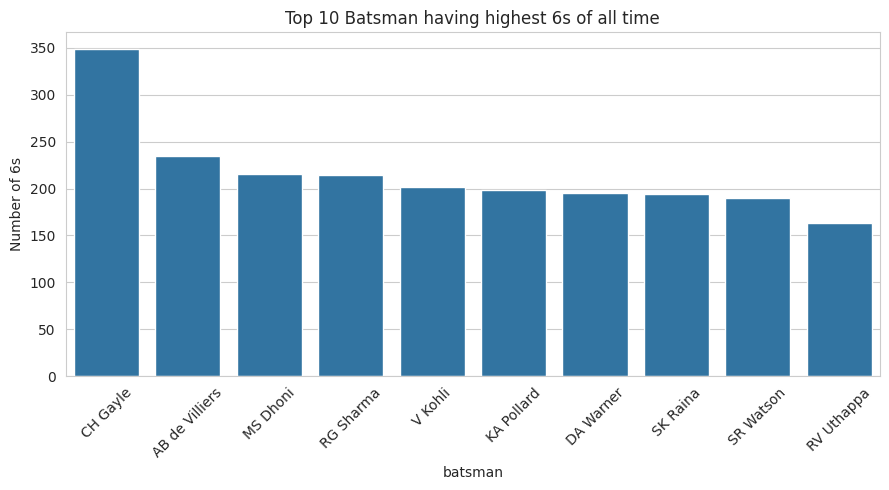

In [ ]:
plt.figure(figsize=(9,5))
sns.barplot(x=sixs_per_batsman.index[:10], y=sixs_per_batsman.values[:10])
plt.title('Top 10 Batsman having highest 6s of all time')
plt.xlabel('batsman')
plt.ylabel('Number of 6s')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
#Question 24 -> Who has the highest strike rate?
highest_strike_rate=balls_df.groupby('batsman')['ball'].count()
total_runs_batsman=balls_df.groupby('batsman')['batsman_runs'].sum()
strike_rate=(total_runs_batsman/highest_strike_rate)*100
strike_rate.idxmax()

'B Stanlake'

In [9]:
#Question 25 -> Who is the leading wicket-taker?
leading_wicket_taker=balls_df[balls_df['player_dismissed'].notnull()].groupby('player_dismissed')['player_dismissed'].count().sort_values(ascending=False).head(1)
leading_wicket_taker.index[0]

#wickets_per_batsman=balls_df[balls_df['is_wicket']==1] & (balls_df['player_dismissed']!='run out')
#wickets_per_batsman['bowler'].value_counts.idxmax()

'RG Sharma'

In [8]:
#Question 26 -> Which stadium has hosted the most number of matches?
most_hosted_stadium=matches_df['venue'].value_counts().idxmax()
most_hosted_stadium

'Eden Gardens'

In [15]:
#Question 27 -> Who has won the most MOM awards?
mom_awards=matches_df['player_of_match'].value_counts()
mom_awards.head(1).index

Index(['AB de Villiers'], dtype='object', name='player_of_match')

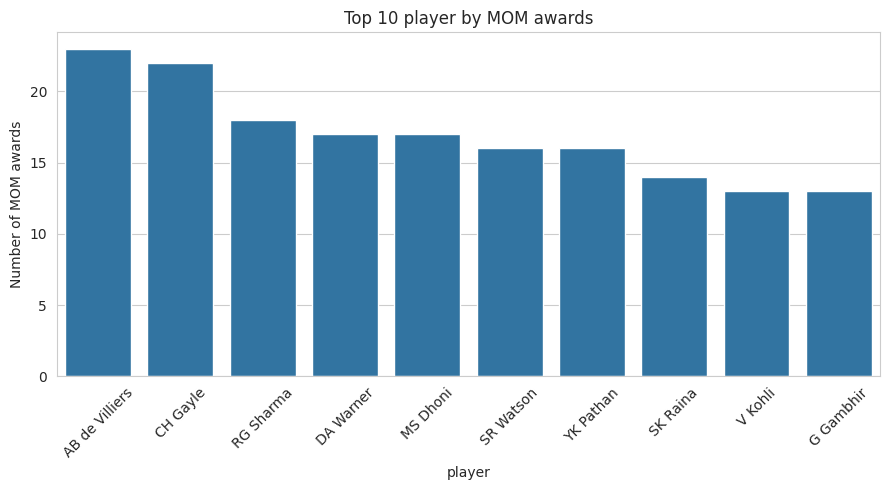

In [16]:
plt.figure(figsize=(9,5))
sns.barplot(x = mom_awards.index[:10], y = mom_awards.values[:10])
plt.title('Top 10 player by MOM awards')
plt.xlabel('player')
plt.ylabel('Number of MOM awards')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [27]:
#Question 28 -> What is the count of fours hit in each season?
balls_with_season=balls_df.merge(matches_df[['id','season']],on='id')
fours=balls_with_season[balls_with_season['batsman_runs']==4].groupby('season')['batsman_runs'].count()
fours

,batsman_runs
season,
2008,1703
2009,1317
2010,1708
2011,1916
2012,1911
2013,2052
2014,1562
2015,1607
2016,1633


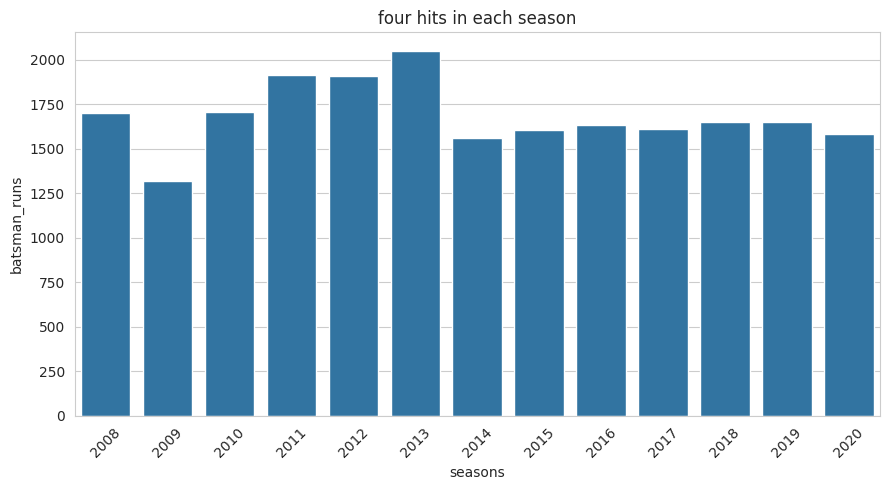

In [29]:
plt.figure(figsize=(9,5))
sns.barplot(x = fours.index[:15], y = fours.values[:15])
plt.title('four hits in each season')
plt.xlabel('seasons')
plt.ylabel('batsman_runs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [30]:
#Question 29 -> What is the count of sixes hit in each season?
balls_with_season=balls_df.merge(matches_df[['id','season']],on='id')
sixs=balls_with_season[balls_with_season['batsman_runs']==6].groupby('season')['batsman_runs'].count()
sixs

,batsman_runs
season,
2008,623
2009,506
2010,585
2011,639
2012,733
2013,675
2014,714
2015,692
2016,639


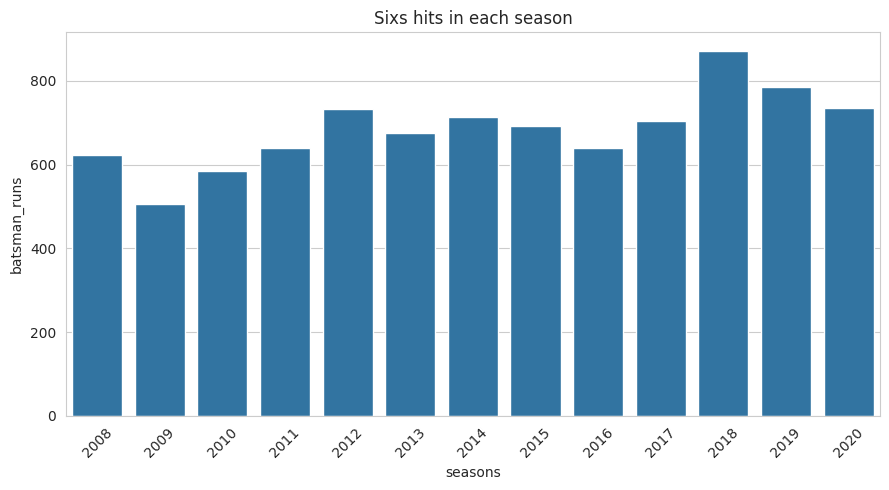

In [31]:
plt.figure(figsize=(9,5))
sns.barplot(x = sixs.index[:15], y = sixs.values[:15])
plt.title('Sixs hits in each season')
plt.xlabel('seasons')
plt.ylabel('batsman_runs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [38]:
#Question 30 -> What is the count of runs scored from boundaries in each season?
#runs_scored_from_boundaries=balls_with_season[balls_with_season['batsman_runs'].isin([4,6])].groupby('season')['batsman_runs'].count()
runs_scored_from_boundaries=balls_with_season[balls_with_season['batsman_runs'].isin([4,6])].groupby('season')['batsman_runs'].sum()
runs_scored_from_boundaries

,batsman_runs
season,
2008,10550
2009,8304
2010,10342
2011,11498
2012,12042
2013,12258
2014,10532
2015,10580
2016,10366


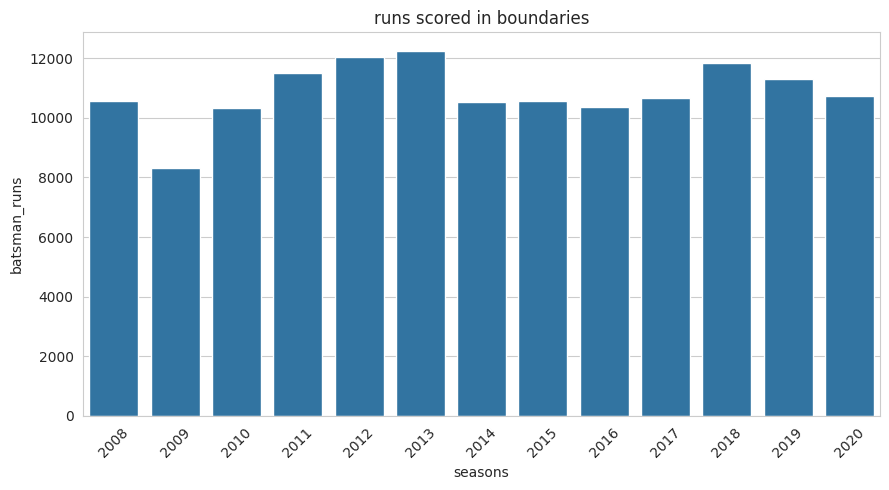

In [39]:
plt.figure(figsize=(9,5))
sns.barplot(x = runs_scored_from_boundaries.index[:15], y = runs_scored_from_boundaries.values[:15])
plt.title('runs scored in boundaries')
plt.xlabel('seasons')
plt.ylabel('batsman_runs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [41]:
#Question 31 -> What is the run contribution from boundaries in each season?
run_contribution_from_boundaries=runs_scored_from_boundaries/balls_with_season.groupby('season')['batsman_runs'].sum()*100
run_contribution_from_boundaries

,batsman_runs
season,
2008,62.763995
2009,54.118874
2010,58.314068
2011,57.697712
2012,56.474230
2013,57.208195
2014,58.765763
2015,60.773163
2016,57.710723


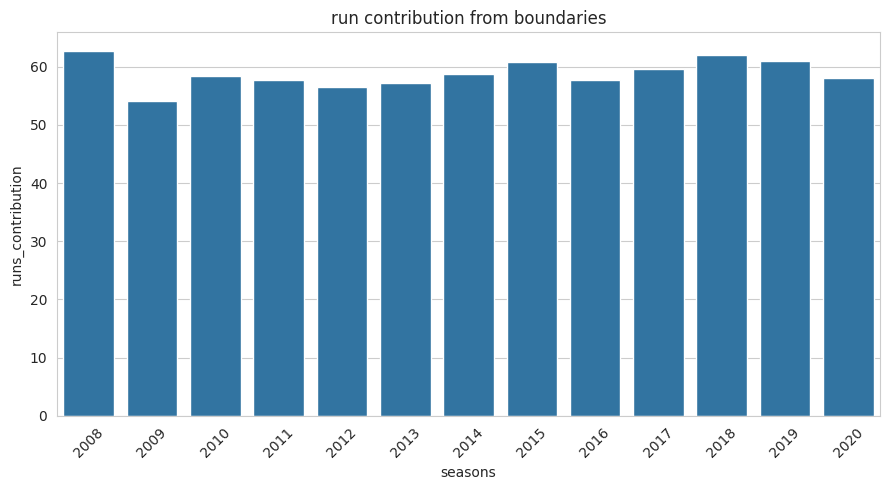

In [42]:
plt.figure(figsize=(9,5))
sns.barplot(x = run_contribution_from_boundaries.index[:15], y = run_contribution_from_boundaries.values[:15])
plt.title('run contribution from boundaries')
plt.xlabel('seasons')
plt.ylabel('runs_contribution')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [44]:
#Question 32 -> Which team has scored the most runs in the first 6 overs?
first_six_overs=balls_df[balls_df['over']<=6]
runs_per_team_first_six_overs=first_six_overs.groupby('batting_team')['total_runs'].sum()
runs_per_team_first_six_overs.idxmax()

'Mumbai Indians'

In [45]:
#Question 33 -> Which team has scored the most runs in the last 4 overs?
last_four_overs=balls_df[balls_df['over']>=16]
runs_per_team_last_four_overs=last_four_overs.groupby('batting_team')['total_runs'].sum()
runs_per_team_last_four_overs.idxmax()

'Mumbai Indians'

In [49]:
#Question 34 -> Which team has the best scoring run-rate in the first 6 overs?
scoring_run_rate_first_six_overs=runs_per_team_first_six_overs/first_six_overs.groupby('batting_team')['ball'].sum()
scoring_run_rate_first_six_overs.idxmax()

'Gujarat Lions'

In [50]:
#Question 35 -> Which team has the best scoring run-rate in the last 4 overs?
scoring_run_last_four_overs=runs_per_team_last_four_overs/last_four_overs.groupby('batting_team')['ball'].sum()
scoring_run_last_four_overs.idxmax()

'Rising Pune Supergiants'